## Pure Particle FCC Box Tensile Simulation

Try to create the whole simulation by myself (with helps)

In [8]:
import subprocess
import os

# remove existed result files
result_files = ['./data/ss.txt','./data/loc.dump','./data/final_model.data']
list(map(os.remove, filter(os.path.exists, result_files)))

return_code = subprocess.call(['mpirun', '-np', '4', 'lmp_mpi', '-pk', 'omp', '4', '-in', 'create_box_and_deform.lmps'])

LAMMPS (2 Aug 2023)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
set 4 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Lattice spacing in x,y,z = 0.0002 0.0002 0.0002
Created orthogonal box = (0 0 0) to (0.001 0.001 0.001)
  2 by 2 by 1 MPI processor grid
Created 605 atoms
  using lattice units in orthogonal box = (-1e-07 -1e-07 0) to (0.0010001 0.0010001 0.001)
  create_atoms CPU = 0.001 seconds
System init for write_data ...
No /omp style for force computation currently active
Changing box ...
  triclinic box = (-2.0002e-07 -2.0002e-07 0) to (0.0010002 0.0010002 0.001) with tilt (0 0 0)
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
No /omp style for force computation currently active
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 0.00068898816
  ghost

## Post Process

In [1]:
import pandas as pd
from pandas import DataFrame as df

# load data
ss_directory = "./data/ss.txt"
with open(ss_directory, 'r') as file:
    data = pd.read_csv(file, sep=' ')[['strain', 'stress33']]

slopes = [0,]
for i in range(1, len(data.index)):
    slopes.append((data['stress33'][i] - data['stress33'][i-1])/(data['strain'][i] - data['strain'][i-1]))
data['slope'] = slopes
data

,strain,stress33,slope
0,0.0000,-7.309126e-04,0.000000e+00
1,0.0001,6.582375e+06,6.582375e+10
2,0.0002,1.281985e+07,6.237473e+10
3,0.0003,1.847177e+07,5.651917e+10
4,0.0004,2.358441e+07,5.112639e+10
...,...,...,...
1996,0.1996,5.451039e+09,5.770930e+09
1997,0.1997,5.451612e+09,5.728830e+09
1998,0.1998,5.452185e+09,5.728543e+09
1999,0.1999,5.452761e+09,5.759356e+09


E = 41.21314426425494 (GPa)


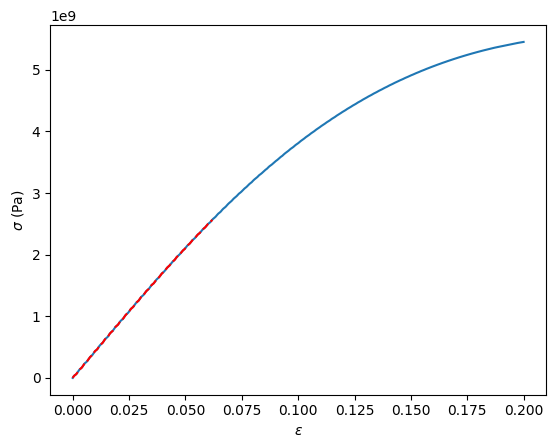

In [4]:
from matplotlib import pyplot as plt
from find_linear_end_index import find_linear_end_index
        
id, best_slope = find_linear_end_index(data['slope'])

plt.plot(data['strain'], data['stress33'], data['strain'][:id], data['stress33'][:id], 'r--')
plt.xlabel('$\epsilon$')
plt.ylabel('$\sigma$ (Pa)')

print("E =", best_slope/1e9, "(GPa)")
